In [1]:
#import
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [4]:
print(type(iris)); 
print(type(digits))

<class 'sklearn.datasets.base.Bunch'>
<class 'sklearn.datasets.base.Bunch'>


In [6]:
print(iris.data[:2])   # training data is stored in data member of iris dataset

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]]


In [13]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
iris.data.shape

(150, 4)

In [15]:
iris.target.shape

(150,)

In [12]:
# print feature
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [16]:
print(type(iris.data), type(iris.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [18]:
# loading featured and responsed into X and y
X = iris.data
y = iris.target

print(X.shape);
print(y.shape)

(150, 4)
(150,)


### Choosing KNN Classifier algorithm to predict the IRIS data

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# instantiate the KN
knn = KNeighborsClassifier(n_neighbors=2)

# training the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
#predict the value [5,4,3,2]
knn.predict([5,4,3,2])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [23]:
knn.predict([[5,4,3,2], [1,2,3,5]])

array([1, 1])

### Using another model - Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lrm = LogisticRegression()

In [26]:
lrm.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lrm.predict([[5,4,3,2], [1,2,3,5]])

array([0, 2])

#### Testing the model accuracy when model is trained with all data

In [28]:
from sklearn import metrics

In [29]:
# test LogisticRegression

# training my model
lrm = LogisticRegression()
lrm.fit(X, y)
y_pred = lrm.predict(X)

# testing accuracy
metrics.accuracy_score(y, y_pred)

0.95999999999999996

In [30]:
# test KNN when K=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)

# testing accracy
metrics.accuracy_score(y, y_pred)

1.0

In [31]:
# test KNN when K = 5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)

# testing accracy
metrics.accuracy_score(y, y_pred)

0.96666666666666667

#### Testing the model accuracy when model is trained with train/test way

In [34]:
# splitting the data 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [35]:
# test LogisticRegression

# training my model
lrm = LogisticRegression()
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)

# testing accuracy
metrics.accuracy_score(y_test, y_pred)

0.94999999999999996

In [36]:
# test KNN when K=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# testing accracy
metrics.accuracy_score(y_test, y_pred)

0.94999999999999996

In [37]:
# test KNN when K=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# testing accracy
metrics.accuracy_score(y_test, y_pred)

0.96666666666666667

By training and testing our data, we can say it is better in KNN when K = 5

In [38]:
# Let's have a loop which will check for all possible value of K
accuracy = []
K = range(1,26)

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # testing accracy
    ac = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(ac)


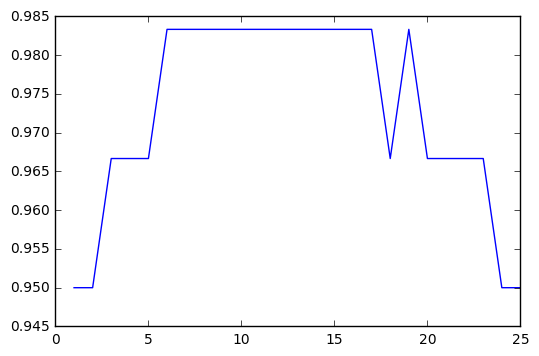

In [40]:
# now plotting it
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(K, accuracy)

In [41]:
# we can see, model is performing better when K between 6 and 16
# let's train our model on KNN when K = 6

# test KNN when K=6

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
y_pred = knn.predict(X)

# testing accracy
metrics.accuracy_score(y, y_pred)

0.97333333333333338